<a href="https://colab.research.google.com/github/piyuchore1234/Dating-profile-matcher/blob/main/signature_extraction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [85]:
#uploading images
template = cv2.imread("/content/drive/MyDrive/Signature Comparison/PaN__01.jpg")
original = cv2.imread("/content/drive/MyDrive/Signature Comparison/priyanka.jpg")


In [86]:
from google.colab.patches import cv2_imshow

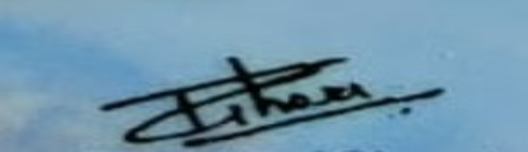

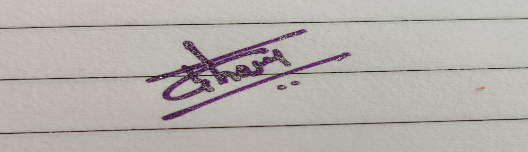

In [87]:
#resizing images
template = cv2.resize(template,(528,152))
cv2_imshow(template)
cv2.waitKey(0)
cv2.destroyAllWindows()
template.shape #row.columns
original = cv2.resize(original,(528,152))
cv2_imshow(original)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [88]:
#ORB Detector
orb = cv2.ORB_create()

original = cv2.Canny(original, 50, 200)
template = cv2.Canny(template, 50, 200)

In [89]:
# key points and descriptor calculation
kp1, desc_1 = orb.detectAndCompute(template, None)
kp2, desc_2 = orb.detectAndCompute(original, None)


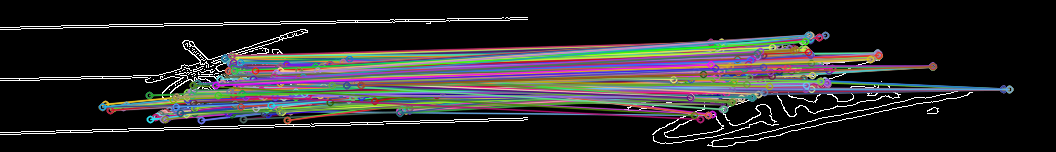

In [90]:
#creating matches
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)
matches_1 = matcher.knnMatch(desc_1, desc_2, 2)
len(matches_1)

result = cv2.drawMatchesKnn(original, kp1 , template, kp2, matches_1, None)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

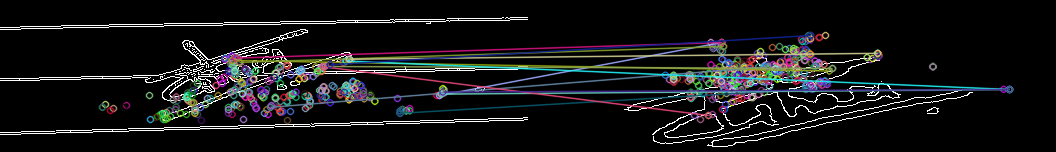

336
389


In [91]:
#distance similarity
good_points = []
for m,n in matches_1:
    if m.distance < 0.8* n.distance:
        good_points.append(m)
len(good_points)

result = cv2.drawMatches(original, kp1 , template, kp2, good_points, None)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(len(kp1))
print(len(kp2))

In [92]:
#calculating ratio
print("How good is the match : ",len(kp1)/len(good_points))

How good is the match :  25.846153846153847
